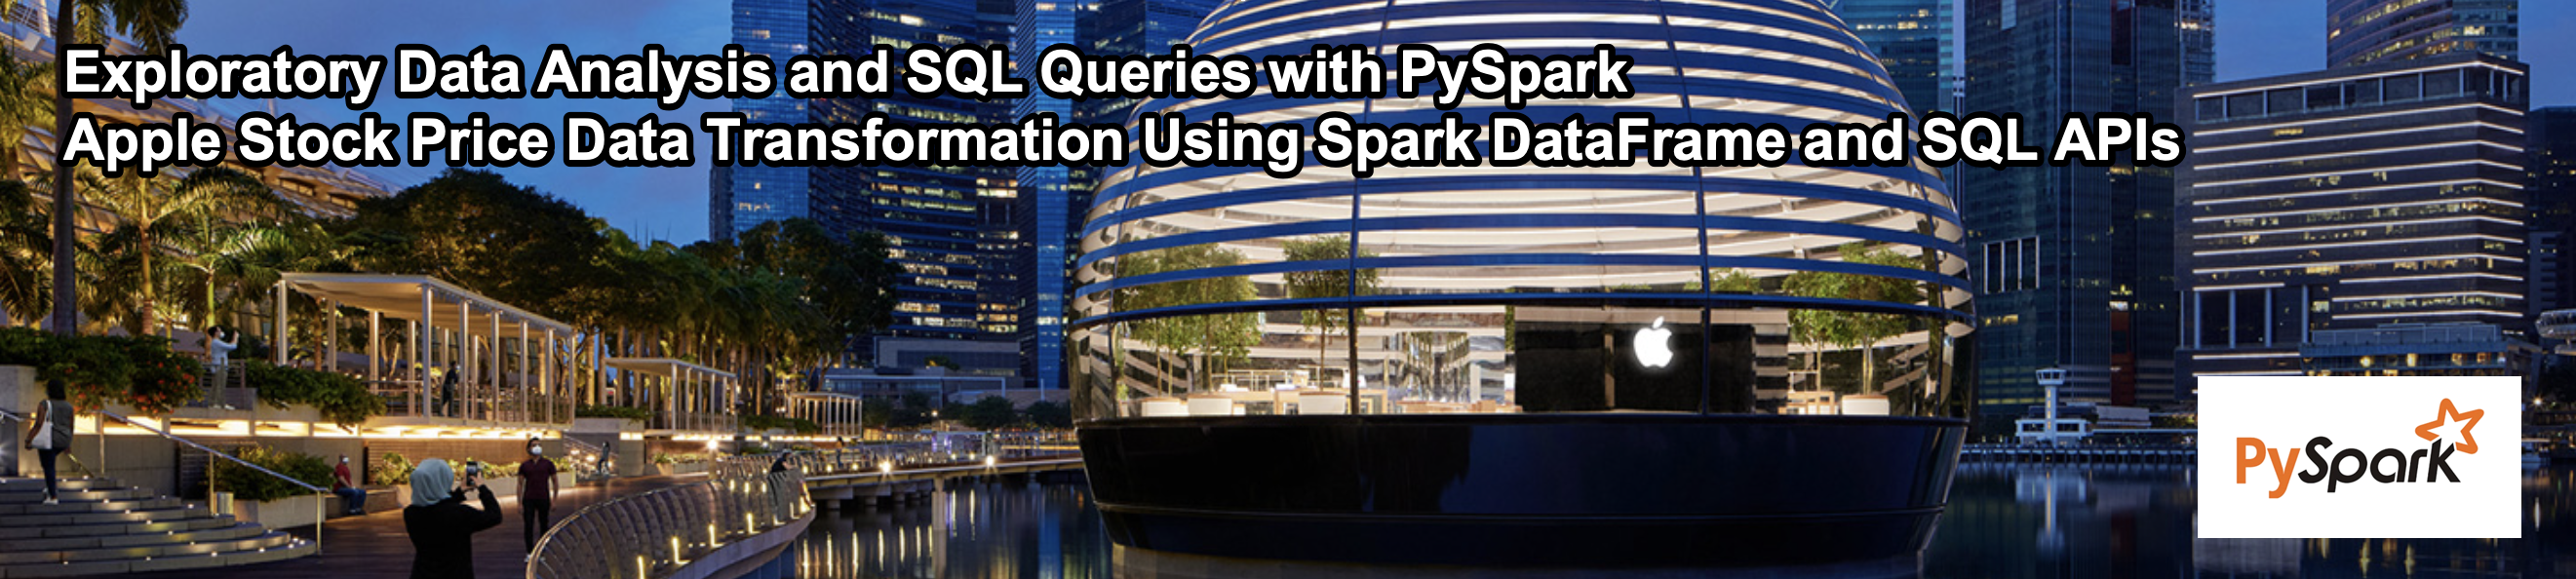

In [1]:
from pyspark.sql import SparkSession

In [2]:
ss = SparkSession.builder.appName('exercise_dataframe').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/28 17:16:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


#### 1. Read the `appl_stock.csv`

In [3]:
df = ss.read.csv('5.1. appl_stock.csv', header=True,inferSchema=True)
df.show(5)

+----------+----------+----------+------------------+------------------+---------+------------------+
|      Date|      Open|      High|               Low|             Close|   Volume|         Adj Close|
+----------+----------+----------+------------------+------------------+---------+------------------+
|2010-01-04|213.429998|214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|214.599998|215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|214.379993|    215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|    211.75|212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|210.299994|212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
+----------+----------+----------+------------------+------------------+---------+------------------+
only showing top 5 rows



#### 2. Count the number of rows with a High value greater than 50

In [4]:
high_count = df.filter(df.High > 50).count()
print(f"Number of rows with High > 50: {high_count}")

Number of rows with High > 50: 1762


#### 3. Create a new column named `myRange`, it is computed by `2*High - Low`

In [5]:
df = df.withColumn('myRange', 2 * df.High - df.Low)
df.show(5)

+----------+----------+----------+------------------+------------------+---------+------------------+------------------+
|      Date|      Open|      High|               Low|             Close|   Volume|         Adj Close|           myRange|
+----------+----------+----------+------------------+------------------+---------+------------------+------------------+
|2010-01-04|213.429998|214.499996|212.38000099999996|        214.009998|123432400|         27.727039|216.61999100000006|
|2010-01-05|214.599998|215.589994|        213.249994|        214.379993|150476200|27.774976000000002|        217.929994|
|2010-01-06|214.379993|    215.23|        210.750004|        210.969995|138040000|27.333178000000004|        219.709996|
|2010-01-07|    211.75|212.000006|        209.050005|            210.58|119282800|          27.28265|214.95000700000003|
|2010-01-08|210.299994|212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|        214.940007|
+----------+----------+---------

#### 4. Rename the `myRange` column to `my-range`

In [6]:
df = df.withColumnRenamed('myRange', 'my-range')
df.show(5)

+----------+----------+----------+------------------+------------------+---------+------------------+------------------+
|      Date|      Open|      High|               Low|             Close|   Volume|         Adj Close|          my-range|
+----------+----------+----------+------------------+------------------+---------+------------------+------------------+
|2010-01-04|213.429998|214.499996|212.38000099999996|        214.009998|123432400|         27.727039|216.61999100000006|
|2010-01-05|214.599998|215.589994|        213.249994|        214.379993|150476200|27.774976000000002|        217.929994|
|2010-01-06|214.379993|    215.23|        210.750004|        210.969995|138040000|27.333178000000004|        219.709996|
|2010-01-07|    211.75|212.000006|        209.050005|            210.58|119282800|          27.28265|214.95000700000003|
|2010-01-08|210.299994|212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|        214.940007|
+----------+----------+---------

#### 5. Filter (using SQL syntax) all the rows where the difference between the High and Low is greater than 5
Note: Return the count

In [7]:
df.createOrReplaceTempView('stock_data')
sql_count = ss.sql("SELECT COUNT(*) as count FROM stock_data WHERE (High - Low) > 5").collect()[0][0]
sql_count

856

In [8]:
#Alternative if high is not always higher than low
#df.createOrReplaceTempView('stock_data')
#sql_count = ss.sql("""
#    SELECT COUNT(*) as count 
#    FROM stock_data 
#    WHERE ABS(High - Low) > 5
#""").collect()[0][0]
#
# sql_count

#### 6. Apply the same filter as before, but using Spark-Dataframe syntax
Note: Return the count

In [9]:
df_count = df.filter(df.High - df.Low > 5).count()
df_count

856

In [21]:
#Alternative if high is not always higher than low
#from pyspark.sql.functions import abs
#df_filtered = df.filter(abs(df["High"] - df["Low"]) > 5)
#count = df_filtered.count()
#count

856

#### 7. Sort by `my-range` in a `desc` order

In [10]:
df_sorted = df.orderBy('my-range', ascending=False)
df_sorted.show(5)

+----------+-----------------+-----------------+-----------------+-----------------+---------+-----------------+-----------------+
|      Date|             Open|             High|              Low|            Close|   Volume|        Adj Close|         my-range|
+----------+-----------------+-----------------+-----------------+-----------------+---------+-----------------+-----------------+
|2012-09-25|       688.260025|692.7800219999999|       673.000023|673.5400089999999|129697400|87.63820799999999|712.5600209999998|
|2012-09-21|       702.409988|       705.070023|699.3599849999999|       700.089989|142897300|         91.09278|       710.780061|
|2012-09-19|       700.259979|       703.989998|       699.569977|       702.100021| 81718700|91.35431700000001|       708.410019|
|2012-09-18|       699.879997|       702.329987|696.4199980000001|       701.910004| 93375800|        91.329593|708.2399759999998|
|2012-09-24|686.8599929999999|       695.119995|682.9999849999999|       690.790016

#### 8. Close spark session

In [11]:
ss.stop()